### Create a Time Series Model to predict the future air passenger traffic

In [2]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the data
data = pd.read_csv('AirPassengers.csv')
# we have data of airline passengers travelled between January 1949 and December 1960

In [4]:
data.head() #first five rows

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.tail() # Last 5 rows

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
data.info() # info about the data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Month is actually given as string here. It must be in date-time format

 parse_dates: parsing the date (Converts the string representation of a date to Date object) 
 index_col: using date column as index


In [9]:
data = pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')

### Basic Checks

In [11]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [13]:
data.rename(columns = {'#Passengers': 'Passengers'},inplace=True)

In [14]:
data['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [15]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### EDA 

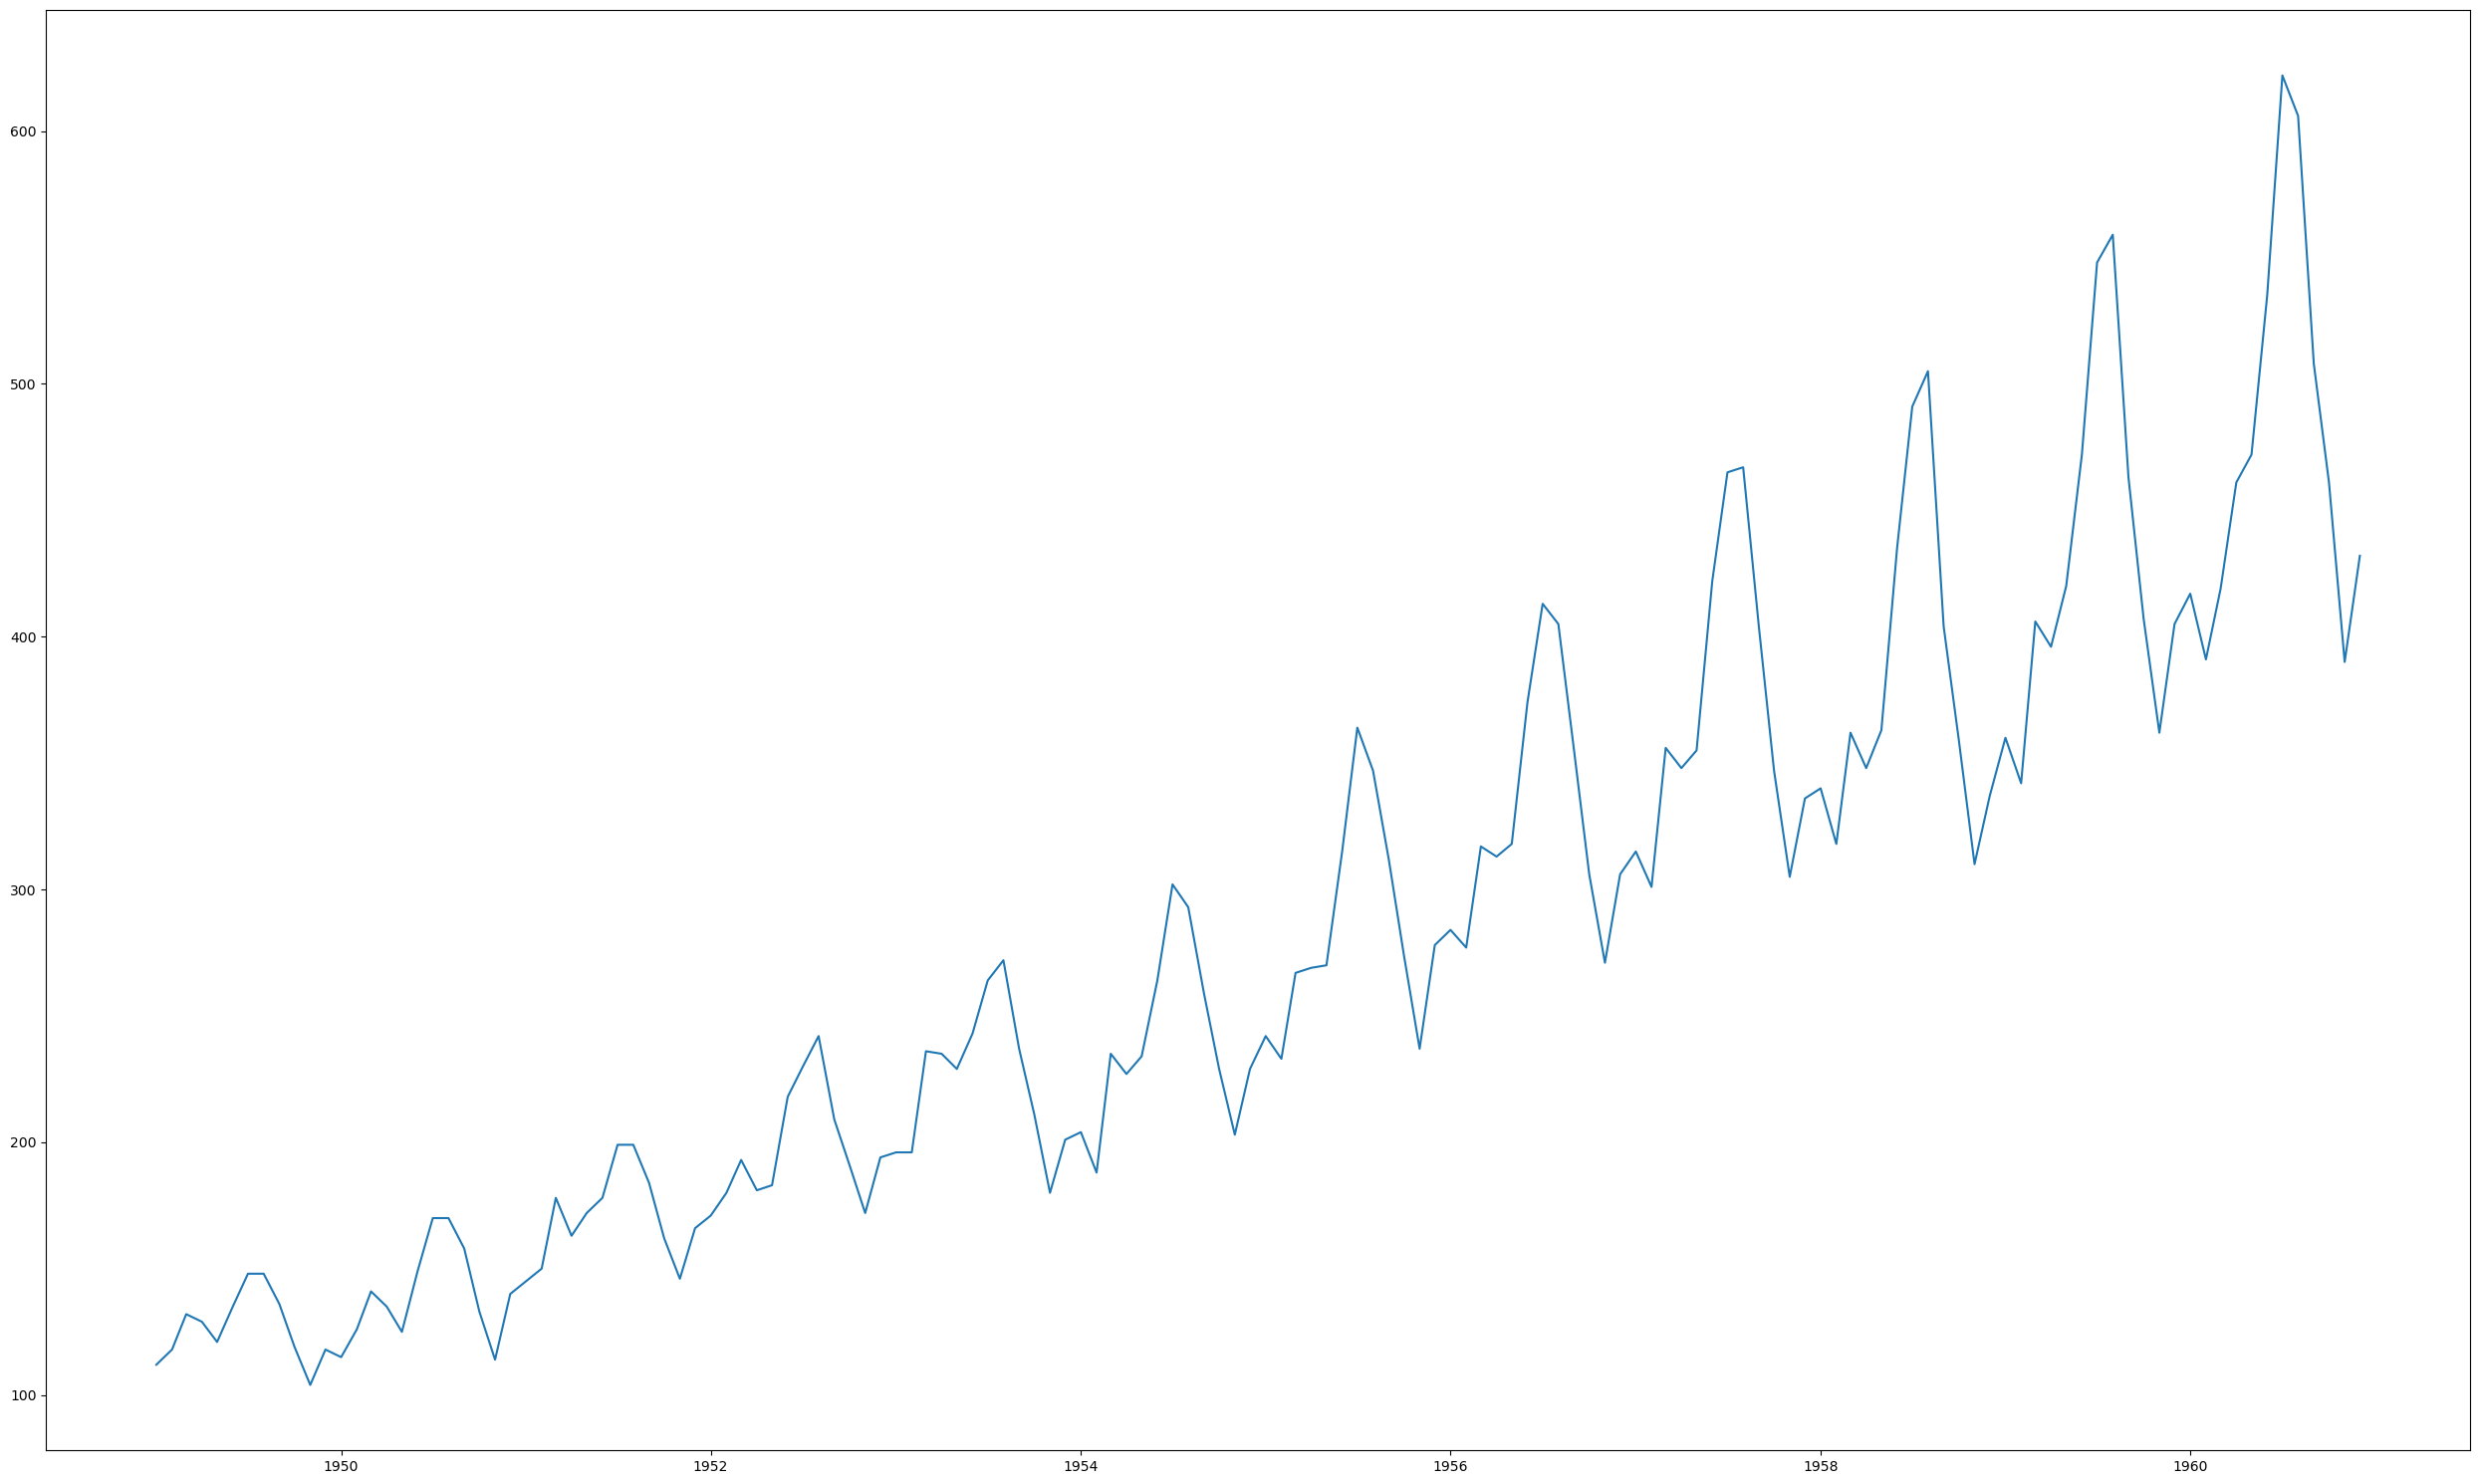

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')
plt.plot(data)
plt.tight_layout()

from plot we can see the series given is not stationary

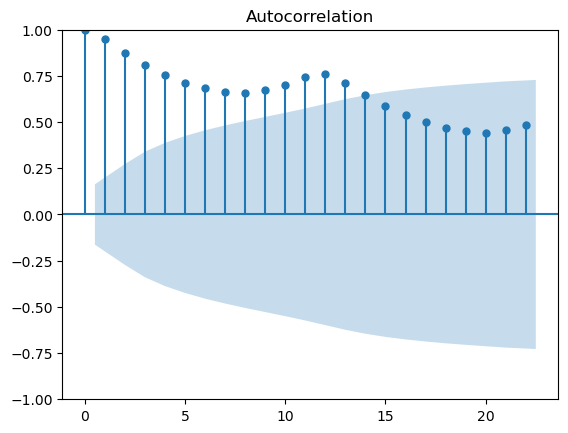

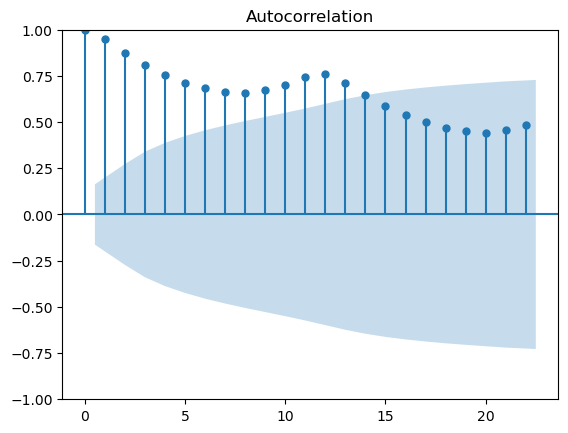

In [19]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

From the autocorrelation plot, it is clear that given series is not stationary.

We can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [22]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Passengers, autolag = "AIC")
print('1. ADF :',dftest[0])
print('2. P-Value :',dftest[1])
print('3. Num of Lags :',dftest[2])
print('4. Num of Observations Used for ADF Regression and Critical Values Calculation :',dftest[3])
print('2. Critical Values :')
for key,val in dftest[4].items():
    print({'\t',key,":",val})

1. ADF : 0.8153688792060547
2. P-Value : 0.9918802434376411
3. Num of Lags : 13
4. Num of Observations Used for ADF Regression and Critical Values Calculation : 130
2. Critical Values :
{'1%', -3.4816817173418295, ':', '\t'}
{-2.8840418343195267, ':', '5%', '\t'}
{'10%', -2.578770059171598, ':', '\t'}


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary. 

In [24]:
## making it stationary by taking difference of 1
data1 = data.diff(periods =1)
#This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [25]:
data1 # Series integrated to the order of 1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [26]:
data1 = data1.iloc[1:]
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


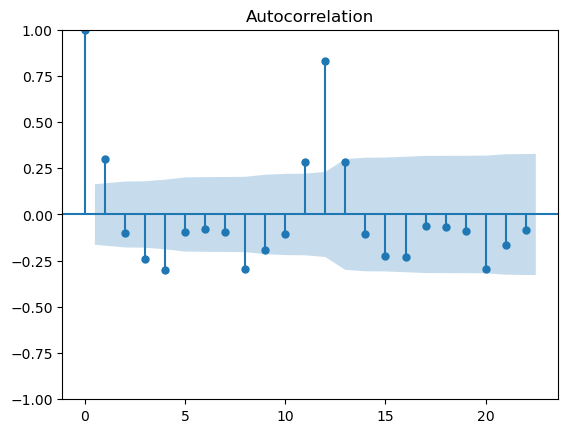

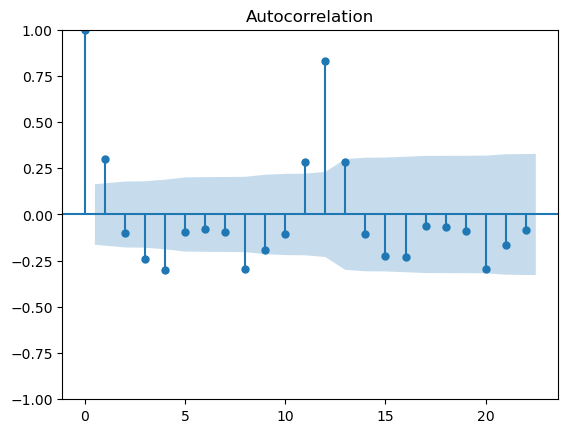

In [27]:
plot_acf(data1)  # autocorrelation plot

In [28]:
data2=data1.diff(periods=1)   # differencing applied to data1

In [29]:
data2=data2.iloc[1:]  # integrated to the order of 2

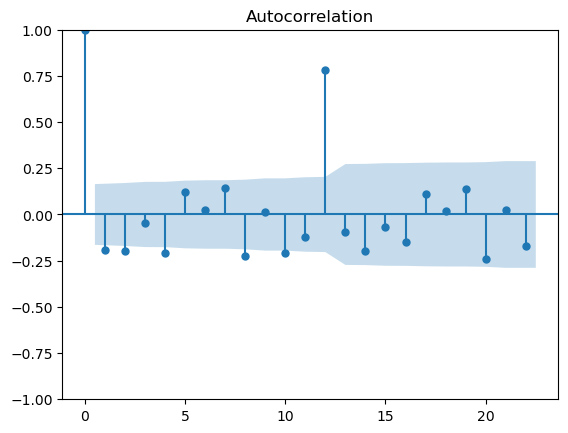

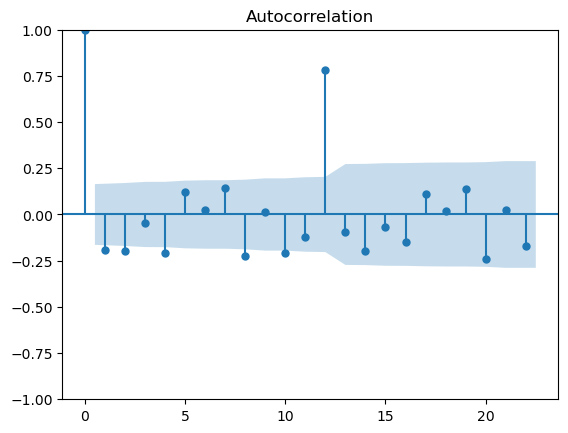

In [30]:
plot_acf(data2)

In [31]:
data2.shape

(142, 1)

In [32]:
## Creating training and test sets
train = data2[:100]  #from 0th row to 99th row - traning data
test = data2[100:]   #from 100th row to end - testing data

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [34]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [35]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [37]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [41]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 8, 12, 13]

In [53]:
# model creation
ar_model = AutoReg(train,lags=[1,8,12,13])   ## object creation with lags specified
ar_model_fit = ar_model.fit()

In [55]:
# making predictions
prediction = ar_model_fit.predict(start=100,end=142)

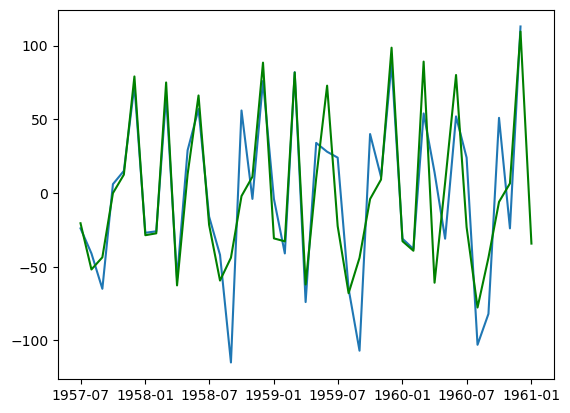

In [57]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green')

In [59]:
# ARIMA Model

In [61]:
## Importing the library
from statsmodels.tsa.arima.model import ARIMA

In [69]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [71]:
print(model_arima_fit.aic)

1021.039638967377


In [73]:
## predicting the output of sample points
predictions = model_arima_fit.forecast(steps=9)

In [75]:
predictions

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

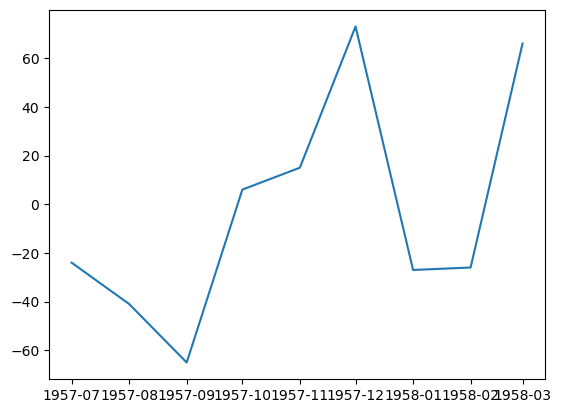

In [77]:
plt.plot(test[:9])

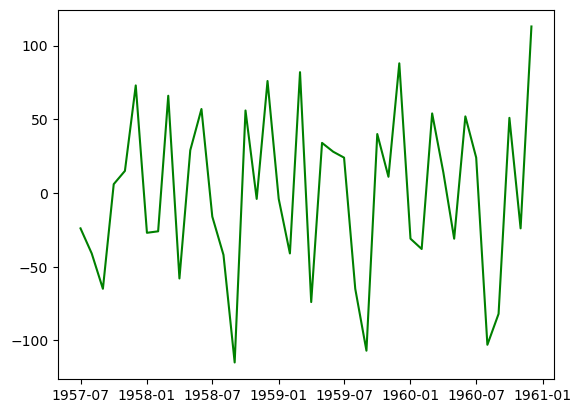

In [79]:
plt.plot(test,color='green')

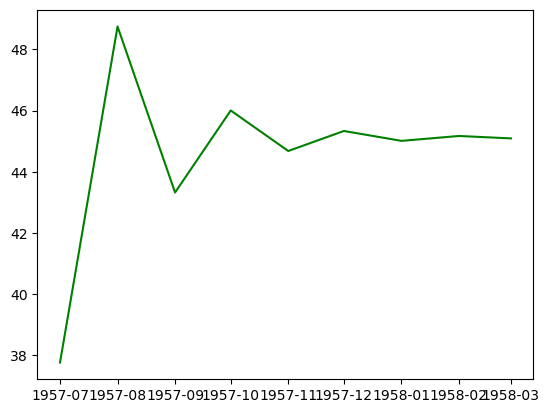

In [81]:
plt.plot(predictions,color='green')

In [85]:
## Geeting the optimal values of p,q an d
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [87]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [103]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.4372810357411
(0, 0, 2) 925.729665470536
(0, 0, 3) 920.9009366451179
(0, 0, 4) 912.6569288467209
(0, 1, 0) 1046.7319001420174
(0, 1, 1) 963.8739374786364
(0, 1, 2) 933.213172459939
(0, 1, 3) 926.5735336609573
(0, 1, 4) 924.311507766486
(0, 2, 0) 1143.9983209811012
(0, 2, 1) 1043.757058421772
(0, 2, 2) 966.1635547263066
(0, 2, 3) 941.612451565128
(0, 2, 4) 933.7565390216572
(0, 3, 0) 1247.2070979635778
(0, 3, 1) 1139.8659454861802
(0, 3, 2) 1044.6471560480547
(0, 3, 3) 972.3660924280153
(0, 3, 4) 956.3754765823495
(0, 4, 0) 1351.0676098839504
(0, 4, 1) 1241.6050826079195
(0, 4, 2) 1139.2023624766869
(0, 4, 3) 1048.6638673425168
(0, 4, 4) 987.4072895133714
(1, 0, 0) 963.0127961436173
(1, 0, 1) 928.707756165652
(1, 0, 2) 919.868563435384
(1, 0, 3) 921.8388157442769
(1, 0, 4) 923.3886062475578
(1, 1, 0) 1021.039638967377
(1, 1, 1) 959.4979670059307
(1, 1, 2) 962.9514176491138
(1, 1, 3) 923.2263857895257
(1, 1, 4) 923.1012645151619
(1, 2, 0) 1098.87

In [105]:
min(list2)  # lowest aic score

904.9117999735854

In [107]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
list1[loc]

(4, 0, 3)

In [109]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [111]:
print(model_arima_fit.aic) # confirm aic score

904.9117999735854


In [113]:
forecast = model_arima_fit.forecast(steps=9)
forecast 

1957-07-01   -51.878512
1957-08-01   -22.750488
1957-09-01    22.964959
1957-10-01   -22.794356
1957-11-01     5.528837
1957-12-01    28.125165
1958-01-01   -28.701863
1958-02-01    -0.724810
1958-03-01    26.554014
Freq: MS, Name: predicted_mean, dtype: float64

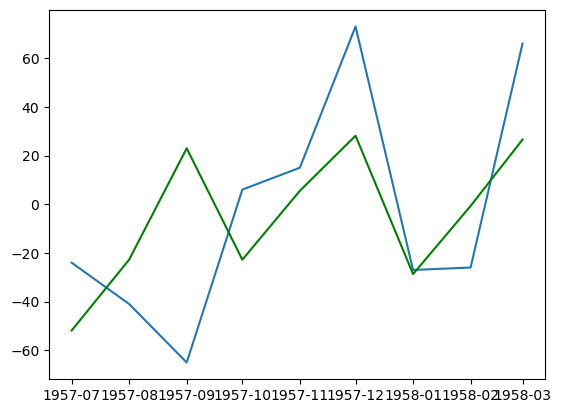

In [115]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [117]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

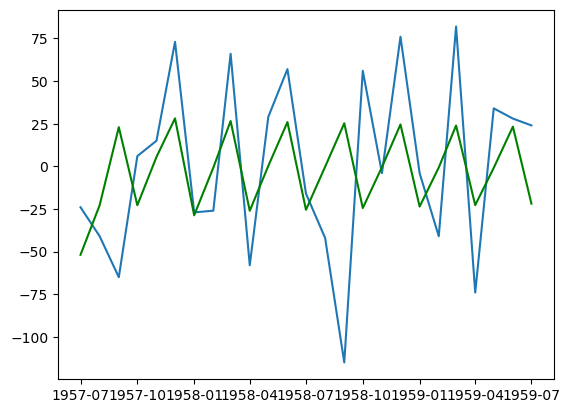

In [119]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [121]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 2351.3758427489333,
 'mae': 38.285800568573976,
 'rmse': 48.49098723215411}

In [123]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)


48.49098723215411


2351.3758427489333